In [1]:
import time
start_time=time.time()

In [2]:
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interpolate
import numpy as np
import pandas as pd
import json

from astropy.io import fits
import astropy.units as u


Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'TAURUS-HV-Ha-'

In [8]:
name_export='TAU-HV-H'

In [9]:
flux_in = data_file + 'Flux.fits'
radial_velocity_in = data_file + 'RV.fits'
#sigma_in = data_file + 'Sigma.fits'

In [10]:
flux=fits.open(datapath_obs / flux_in)
rad_vel=fits.open(datapath_obs / radial_velocity_in)
#sigma=fits.open(datapath_obs / sigma_in)

Input data of the region

In [11]:
distance = 500000 #parsecs
pix = 0.26 #arcsec 
seeing = 0.9 #seeing arcsec FWHM

In [12]:
pc = distance*(2*np.pi) / (360 * 60 * 60) #arcsec to parsecs
s0 = (seeing*pc)/2.355 #seeing pc RMS
pc,s0

(2.42406840554768, 0.9263955689991135)

Flux map

Text(0.5, 1.0, 'H$_{α}$ Flux')

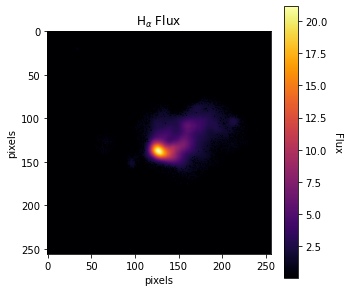

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))

image_data=flux[0].data

plt.imshow(image_data, cmap='inferno')

ax.set_xlabel('pixels')
ax.set_ylabel('pixels')

cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15) 

plt.title('H$_{α}$ Flux')

Matrix to List

In [14]:
flx=flux[0].data
df=pd.DataFrame(flx)
dffx=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'I'})
dffx.describe()

,X,Y,I
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,3.528891e-01
std,73.900834,73.900834,1.449902e+00
min,0.000000,0.000000,5.289438e-09
25%,63.750000,63.750000,5.289438e-09
50%,127.500000,127.500000,5.289438e-09
75%,191.250000,191.250000,5.289438e-09
max,255.000000,255.000000,2.115935e+01


Radial velocity map

Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

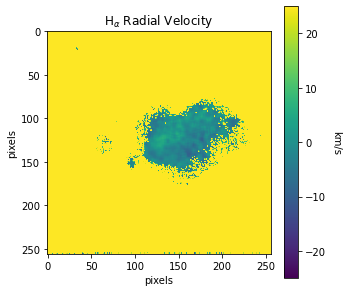

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))

image_data=rad_vel[0].data

plt.imshow(image_data, cmap='viridis')

ax.set_xlabel('pixels')
ax.set_ylabel('pixels')

cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-25,25) 

plt.title('H$_{α}$ Radial Velocity')

Matrix to List

In [16]:
vel=rad_vel[0].data
df=pd.DataFrame(vel)
dfvr=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})
dfvr.describe()

,X,Y,RV
count,65536.000000,65536.000000,65536.000000
mean,127.500000,127.500000,108.074671
std,73.900834,73.900834,40.049776
min,0.000000,0.000000,-15.575094
25%,63.750000,63.750000,122.940002
50%,127.500000,127.500000,122.940002
75%,191.250000,191.250000,122.940002
max,255.000000,255.000000,126.898609


Sigma map

fig, ax = plt.subplots(figsize=(5, 5))

image_data=sigma[0].data

plt.imshow(image_data, cmap='magma')

ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')

cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  

#plt.gca().invert_yaxis()
plt.title('H$_{α}$ σ$_{disp}$')

Matrix to list

sig=sigma[0].data
df=pd.DataFrame(sig)
dsig=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'Sig'})
dsig.describe()

Merge previous lists

In [17]:
data=dfvr
data['I']=dffx.I
#data['Sig']=dsig.Sig
data.describe()

,X,Y,RV,I
count,65536.000000,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,108.074671,3.528891e-01
std,73.900834,73.900834,40.049776,1.449902e+00
min,0.000000,0.000000,-15.575094,5.289438e-09
25%,63.750000,63.750000,122.940002,5.289438e-09
50%,127.500000,127.500000,122.940002,5.289438e-09
75%,191.250000,191.250000,122.940002,5.289438e-09
max,255.000000,255.000000,126.898609,2.115935e+01


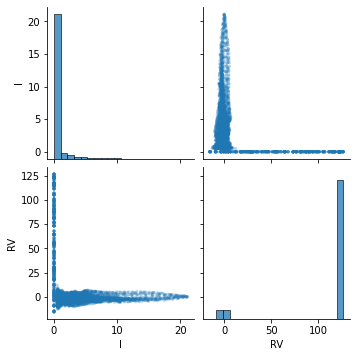

In [18]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

Clean data

In [19]:
mI=(data.I>data.I.mean()+0.5*data.I.std())&(data.Y>109)
data=data[mI]

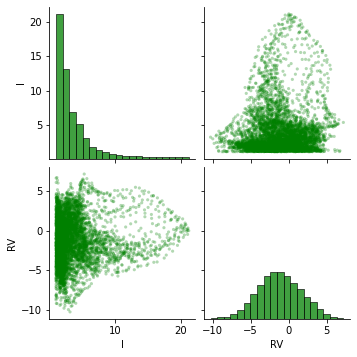

In [20]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none',color='green'),
             diag_kws=dict(bins=20, color="green"),
            )

In [21]:
data.describe()

,X,Y,RV,I
count,5832.000000,5832.000000,5832.000000,5832.000000
mean,120.644719,159.083162,-1.234946,3.741947
std,19.483477,26.602077,2.804594,3.291084
min,80.000000,110.000000,-10.268204,1.078257
25%,105.000000,137.000000,-3.153568,1.752981
50%,119.000000,159.000000,-1.317711,2.530523
75%,136.000000,179.000000,0.691124,4.411604
max,164.000000,220.000000,7.164047,21.159351


standars errors

In [22]:
data.sem()

X     0.255128
Y     0.348343
RV    0.036725
I     0.043095
dtype: float64

Clean maps and other results

Text(0.5, 1.0, 'NGC 595')

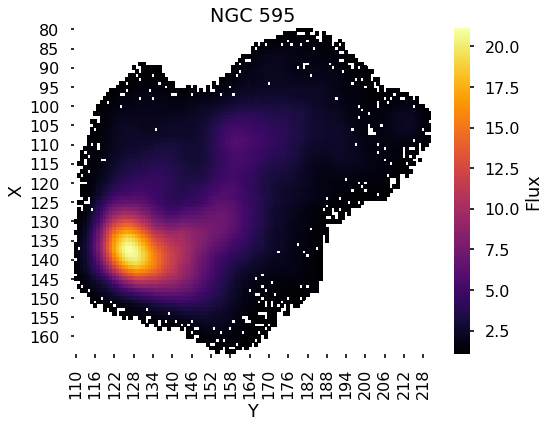

In [23]:
plt.style.use([
    "seaborn-poster",
])

fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot()

datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='X', columns='Y', values='I')
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
#plt.title('H$_{α}$ Flux')
plt.title('NGC 595')

#plt.savefig('Imgs//Flux//N604.pdf', bbox_inches='tight')


Text(0.32, 0.9, '60 pc')

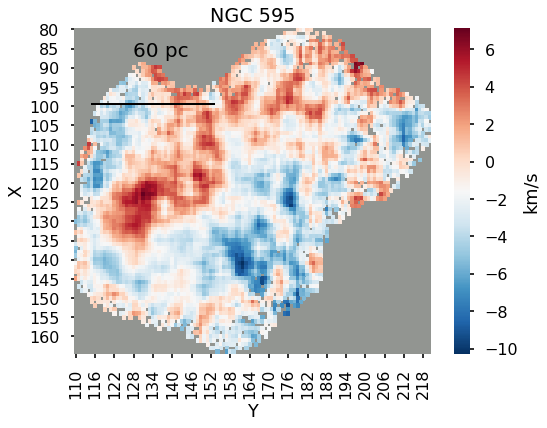

In [24]:
plt.style.use([
    "seaborn-poster",
])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

datal=data.copy()

dataH_rv=(datal.round(2)).pivot(index='X', columns='Y', values='RV')
sns.heatmap(dataH_rv, cmap="RdBu_r",cbar_kws={'label': 'km/s'})
plt.title('NGC 595')
ax.set_facecolor('xkcd:gray')

plt.axhline(y=20, xmin=0.05, xmax=0.39, linewidth=2, color = 'k')

ax.text(0.32, 0.9, '60 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)

#plt.savefig('Imgs//VF//N604.pdf', bbox_inches='tight')


plt.style.use([
    "seaborn-poster",
])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

datal=data.copy()

dataH_s=(datal.round(2)).pivot(index='X', columns='Y', values='Sig')

sns.heatmap(dataH_s, cmap="magma",cbar_kws={'label': 'km/s'})
plt.title('H$_{α}$ σ')
#plt.savefig('TAURUS/Imgs/A/'+reg+'SH.png')

Sigma disp - deconvolution

data['SigDisp']=(data.Sig**2-9.08**2-14.5**2)**0.5

In [25]:
data.describe()

,X,Y,RV,I
count,5832.000000,5832.000000,5832.000000,5832.000000
mean,120.644719,159.083162,-1.234946,3.741947
std,19.483477,26.602077,2.804594,3.291084
min,80.000000,110.000000,-10.268204,1.078257
25%,105.000000,137.000000,-3.153568,1.752981
50%,119.000000,159.000000,-1.317711,2.530523
75%,136.000000,179.000000,0.691124,4.411604
max,164.000000,220.000000,7.164047,21.159351


fig, ax = plt.subplots()
plt.scatter(np.log10(data.I),data.SigDisp, alpha=0.04, color='k',label='NGC 595')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{disp}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(data.I),data.RV, alpha=0.04, color='k',label='NGC 595')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(data.RV,data.SigDisp, alpha=0.04, color='k',label='NGC 595')

ax.set_xlabel('centroid velocity [km/s]')
ax.set_ylabel('$σ_{disp}$ [km/s]')
plt.legend()



Text(0.5, 6.799999999999979, 'Radial velocity [km/s]')

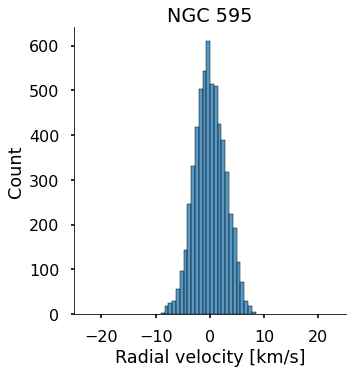

In [26]:
#fig, ax = plt.subplots()

sns.displot(data.RV-data.RV.mean(),bins=25)
plt.xlim(-25,25)

#plt.text(0.65, 1.20,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.70, 0.82,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.65, 1.3,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('NGC 595')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlabel('Radial velocity [km/s]')

Export data

In [27]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
         name_export : np.array(data),
      }
data_export_list

{'name': 'TAU-HV-H',
 'pc': 2.42406840554768,
 's0': 0.9263955689991135,
 'pix': 0.26,
 'TAU-HV-H': array([[ 8.00000000e+01,  1.79000000e+02,  1.55433704e-01,
          1.18844700e+00],
        [ 8.00000000e+01,  1.80000000e+02, -6.48101775e-01,
          1.20192052e+00],
        [ 8.00000000e+01,  1.81000000e+02, -1.54091640e+00,
          1.18188191e+00],
        ...,
        [ 1.64000000e+02,  1.57000000e+02, -6.36212155e+00,
          1.11600686e+00],
        [ 1.64000000e+02,  1.58000000e+02, -3.14798733e+00,
          1.15838528e+00],
        [ 1.64000000e+02,  1.59000000e+02, -3.88456723e+00,
          1.12587929e+00]])}

In [28]:
data_export_matrix = {
       'name': name_export, 
       'pc' : pc,
       's0' : s0,
       'pix' : pix,
       'sb' :np.array(dataH_f),
       'vv' : np.array(dataH_rv),
#       'ss' : np.array(dataH_s),

      }

data_export_matrix

{'name': 'TAU-HV-H',
 'pc': 2.42406840554768,
 's0': 0.9263955689991135,
 'pix': 0.26,
 'sb': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'vv': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]])}

In [29]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [30]:
jsonfilename =name_export +"-m.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_matrix, fp=f, indent=3, cls=MyEncoder)

In [31]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [32]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 8.58909821510315 seconds ---


In [33]:
!jupyter nbconvert --to script --no-prompt otv-TAU-HV-H.ipynb

[NbConvertApp] Converting notebook otv-TAU-HV-H.ipynb to script
[NbConvertApp] Writing 7161 bytes to otv-TAU-HV-H.py
